In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Trees.Tree import TreeRegressor
from metrics import mse, accuracy, me
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
SIZE = 100

noise = np.random.normal(0, 0.2, size=SIZE)
x = np.random.uniform(-3, 3, size=SIZE)
y = np.sin(x)
df = pd.DataFrame(columns=['x', 'f(x)'])
df['x'] = x
df['f(x)'] = y + noise

<AxesSubplot:xlabel='x', ylabel='f(x)'>

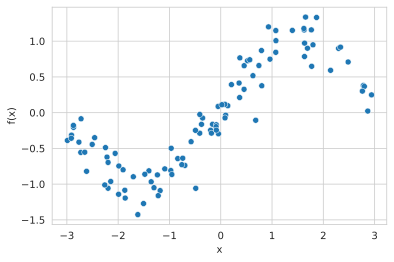

In [50]:
sns.scatterplot(data=df, x = 'x', y = 'f(x)')

In [51]:
model = TreeRegressor(max_depth=3, metric=mse, criterion='entropy', minimize=True)
model.fit(df, target='f(x)')
model.predict(df, 'pred f(x)')

-1.194916    1
 0.110611    1
-0.286672    1
-0.553549    1
-0.820622    1
            ..
-0.728069    1
-1.161675    1
-1.091069    1
-0.163001    1
-0.637501    1
Name: f(x), Length: 100, dtype: int64
feature: x, values {'left': -0.6822923670092976, 'right': 0.5136846315796} split_predict 0.1765235774689355

{'best_score': 0.1765235774689355, 'best_feature': 'x', 'best_threshold': -0.2759854862018578, 'left_value': -0.6822923670092976, 'right_value': 0.5136846315796} 
------------------------------

-1.194916    1
-0.556763    1
-0.897060    1
-0.085897    1
-0.178262    1
-0.388815    1
-0.861880    1
-0.799454    1
-0.865203    1
-0.489097    1
-0.820622    1
-0.553549    1
-0.444499    1
-0.696612    1
-0.314377    1
-0.786999    1
-0.025232    1
-0.247436    1
-0.358070    1
-0.642881    1
-1.085815    1
-1.011788    1
-0.350450    1
-0.871094    1
-0.967301    1
-0.406270    1
-0.412956    1
-0.621893    1
-0.569885    1
-1.426424    1
-1.057563    1
-0.287344    1
-1.272061    

<AxesSubplot:xlabel='x', ylabel='pred f(x)'>

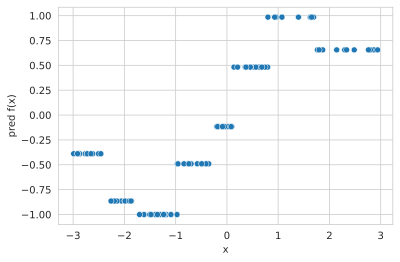

In [52]:
sns.scatterplot(data=df, x = 'x', y = 'pred f(x)')

In [53]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex', 'species'], axis=1)
dataset = dataset.fillna(0)

In [57]:
train, test = train_test_split(dataset, train_size=0.8, shuffle=True, random_state=42)
# test = test.drop('species', axis=1)
model = TreeRegressor(metric=mse, criterion='entropy', max_depth=10, minimize=True, debug=False)
model.fit(train, target='body_mass_g')
model.predict(test, predict_col='pred')


In [58]:
me(test['pred'], test['body_mass_g'])

368.1159420289855

In [59]:
np.std(test['body_mass_g'])

933.354712150505